<a href="https://colab.research.google.com/github/Aarsh13/GenAI_Lab/blob/main/Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a single-layer perceptron from scratch and demonstrate binary classification.

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
class Perceptron:

  def __init__(self, learning_rate=0.01, epochs=100):
    self.weights = None
    self.bias = None
    self.learning_rate = learning_rate
    self.epochs = epochs
    self.activation_func = self._unit_step_func

  def _unit_step_func(self, x):
    return np.where(x>=0, 1, 0)

  def fit(self, X, y):
    n_samples, n_features= X.shape

    self.weights = np.zeros(n_features)
    self.bias = 0

    y_ = np.array([1 if i > 0 else 0 for i in y])


    for _ in range(self.epochs):
      for idx, x_i in enumerate(X):

        linear_output= np.dot(x_i, self.weights)+ self.bias
        y_predicted= self.activation_func(linear_output)

        update= self.learning_rate*(y_[idx]-y_predicted)

        self.weights+= update*x_i
        self.bias+= update

  def predict(self, X):
    linear_output= np.dot(X, self.weights)+ self.bias
    y_predicted= self.activation_func(linear_output)
    return y_predicted




In [ ]:
X, y = make_blobs(n_samples=150, n_features=2, centers=2, cluster_std=1.05, random_state=2)

In [ ]:
p = Perceptron(learning_rate=0.01, epochs=1000)
p.fit(X, y)

predictions= p.predict(X)
print(f"Weights: {p.weights}")
print(f"Bias: {p.bias}")

print(f"Accuracy: {np.sum(predictions==y)/len(y)}")

Weights: [0.03214146 0.05050493]
Bias: 0.19000000000000003
Accuracy: 1.0


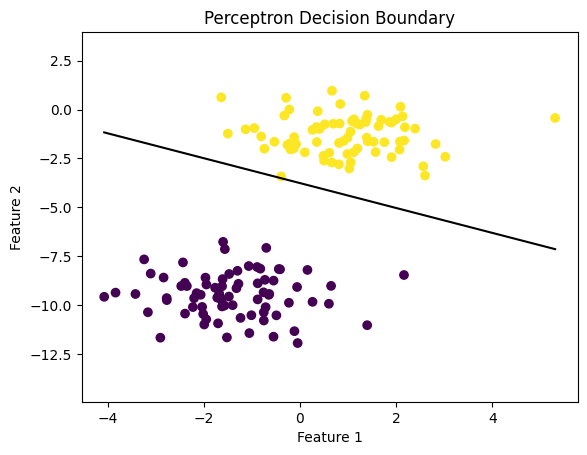

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)


plt.scatter(X[:, 0], X[:, 1], marker='o', c=y)

x0_1 = np.amin(X[:, 0])
x0_2 = np.amax(X[:, 0])

x1_1 = (-p.weights[0] * x0_1 - p.bias) / p.weights[1]
x1_2 = (-p.weights[0] * x0_2 - p.bias) / p.weights[1]

ax.plot([x0_1, x0_2], [x1_1, x1_2], 'k')

ymin = np.amin(X[:, 1])
ymax = np.amax(X[:, 1])
ax.set_ylim([ymin - 3, ymax + 3])
plt.title("Perceptron Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

Implement and compare activation functions (ReLU, Sigmoid, Tanh) using plots.

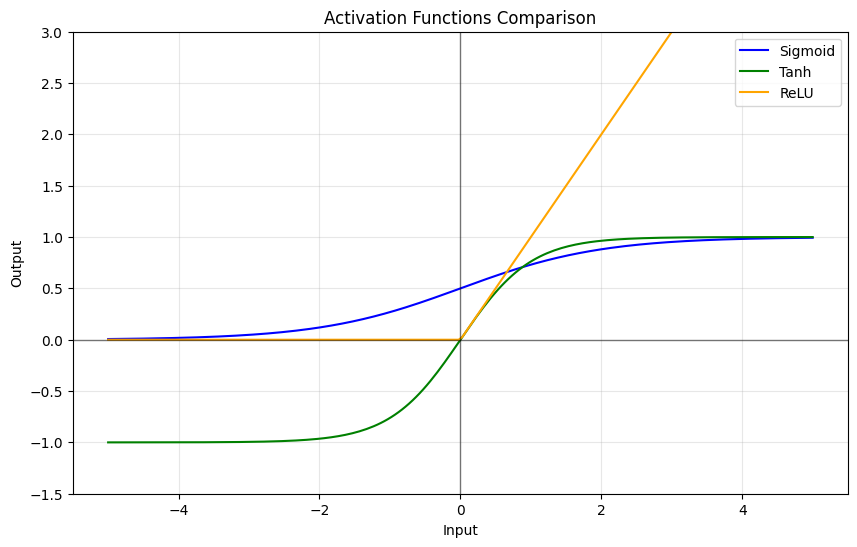

In [ ]:
def sigmoid(x):
  return 1/(1+ np.exp(-x))

def tanh(x):
  return (np.exp(x)- np.exp(-x))/(np.exp(x) + np.exp(-x))

def relu(x):
  return np.maximum(0, x)

x = np.linspace(-5, 5, 200)

plt.figure(figsize=(10, 6))

plt.plot(x, sigmoid(x), label='Sigmoid', color='blue')
plt.plot(x, tanh(x), label='Tanh', color='green')
plt.plot(x, relu(x), label='ReLU', color='orange')

plt.title('Activation Functions Comparison')
plt.xlabel('Input')
plt.ylabel('Output')
plt.axhline(y=0, color='black', linewidth=1, alpha=0.5)
plt.axvline(x=0, color='black', linewidth=1, alpha=0.5)
plt.grid(True, alpha=0.3)
plt.legend()
plt.ylim([-1.5, 3])

plt.savefig('activation_functions_single_plot.png')
plt.show()


# Task
Implement linear regression from scratch using gradient descent.

In [8]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def predict(self, X):

        X = np.array(X)
        if self.weights is None or self.bias is None:
            raise ValueError("Model not trained. Weights and bias are not initialized.")
        return X @ self.weights + self.bias



In [9]:
class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):

        X = np.array(X)
        if self.weights is None or self.bias is None:
            raise ValueError("Model not trained. Weights and bias are not initialized.")
        return X @ self.weights + self.bias

    def fit(self, X, y, learning_rate, epochs):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape

        if self.weights is None:
            self.initialize_parameters(n_features)

        for _ in range(epochs):
            y_predicted = self.predict(X)

            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db



In [10]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

print("Synthetic data generated successfully.")
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Synthetic data generated successfully.
Shape of X: (100, 1)
Shape of y: (100,)


In [11]:
model = LinearRegression()
learning_rate = 0.01
epochs = 1000

model.fit(X, y, learning_rate, epochs)

print(f"Trained Weights: {model.weights}")
print(f"Trained Bias: {model.bias}")

Trained Weights: [47.11710654]
Trained Bias: 2.323185502823648


In [12]:
import numpy as np

class LinearRegression:
    def __init__(self):
        self.weights = None
        self.bias = None

    def initialize_parameters(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0

    def predict(self, X):

        X = np.array(X)
        if self.weights is None or self.bias is None:
            raise ValueError("Model not trained. Weights and bias are not initialized.")
        return X @ self.weights + self.bias

    def fit(self, X, y, learning_rate, epochs):
        X = np.array(X)
        y = np.array(y)

        n_samples, n_features = X.shape

        if self.weights is None:
            self.initialize_parameters(n_features)

        for _ in range(epochs):
            y_predicted = self.predict(X)

            error = y_predicted - y

            dw = (1 / n_samples) * np.dot(X.T, error)
            db = (1 / n_samples) * np.sum(error)

            self.weights -= learning_rate * dw
            self.bias -= learning_rate * db



In [13]:
model = LinearRegression()
learning_rate = 0.01
epochs = 1000

model.fit(X, y, learning_rate, epochs)

print(f"Trained Weights: {model.weights}")
print(f"Trained Bias: {model.bias}")

Trained Weights: [47.11710654]
Trained Bias: 2.323185502823648


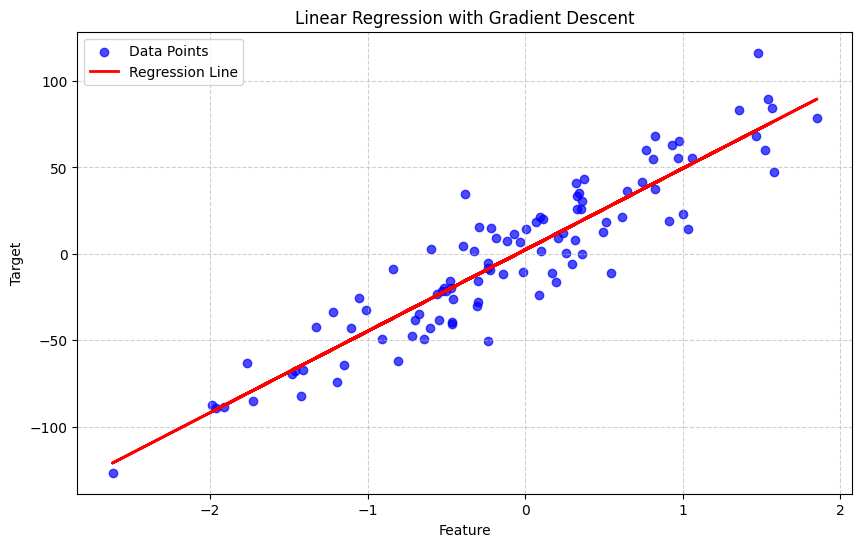

Plot of data points and regression line displayed.


In [14]:
import matplotlib.pyplot as plt

y_predicted = model.predict(X)

plt.figure(figsize=(10, 6))

plt.scatter(X, y, label='Data Points', color='blue', alpha=0.7)
plt.plot(X, y_predicted, label='Regression Line', color='red', linewidth=2)

plt.title('Linear Regression with Gradient Descent')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

print("Plot of data points and regression line displayed.")

# TASK

Build a feed-forward neural network for digit classification (MNIST)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

In [16]:
mnist= tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test)= mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [17]:
X_test, X_test= X_train/255.0, X_test/255.0

In [18]:
model= models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [20]:
history= model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7021 - loss: 7.9679 - val_accuracy: 0.0974 - val_loss: 2.2815
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8404 - loss: 0.6253 - val_accuracy: 0.0974 - val_loss: 2.3811
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8781 - loss: 0.4751 - val_accuracy: 0.0974 - val_loss: 2.4875
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8900 - loss: 0.4121 - val_accuracy: 0.0974 - val_loss: 2.5440
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8978 - loss: 0.3908 - val_accuracy: 0.0974 - val_loss: 2.5798
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9044 - loss: 0.3729 - val_accuracy: 0.0974 - val_loss: 2.5917
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9069 - loss: 0.3571 - val_accuracy: 0.0974 - val_loss: 2.6164
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9113 - loss: 0.3451

In [21]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')
predictions = model.predict(X_test[:5])

313/313 - 1s - 2ms/step - accuracy: 0.0974 - loss: 2.6333

Test accuracy: 0.0974
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step



Displaying sample predictions...


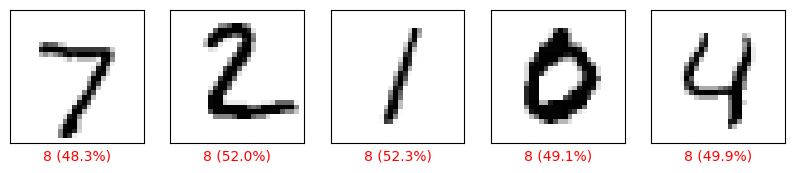

In [23]:
def plot_image(i, predictions_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img[i], cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    color = 'blue' if predicted_label == true_label[i] else 'red'
    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.1f}%)", color=color)

print("\nDisplaying sample predictions...")
plt.figure(figsize=(10, 2))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plot_image(i, predictions[i], y_test, X_test)
plt.show()